In [1]:
import numpy as np                   # for multi-dimensional containers
import pandas as pd       # for DataFrame
import json
import platypus as plat              # multi-objective optimisation framework
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
import pygmo as pg

In [3]:
json_file = "borda-combined.json"
j = json.load(open(json_file))

In [4]:
df = pd.json_normalize(j["data"])
df

,map-id,source,target,voting-mechanism,child-generation-method,gen0-front,gen0-norm-front,gen0-raw-d-score,gen0-norm-d-score,gen0-sparsity,...,gen5-front,gen5-norm-front,gen5-raw-d-score,gen5-norm-d-score,gen5-sparsity,gen5-raw-winner,gen5-norm-winner,gen5-winner-raw-d-score,gen5-winner-norm-d-score,gen5-time
0,dao-map/ost004d.map,4274,937,borda,weighted_combined,"[[50, 50.414, 564, 126, 175.5], [61, 74.248, 1...","[[0, 0, 0.922892, 1, 0], [1, 1, 0, 0.656863, 1...","[608.123, 329.784, 630.874, 608.123]","[1.36078, 1.85242, 1.0067, 1.36078]",50956.50,...,"[[50, 60.35, 254, 75, 187.5], [50, 52.07, 501,...","[[0, 0.598525, 0.122195, 0, 0.512821], [0, 5.1...","[608.123, 329.784, 630.874, 608.123]","[0.797589, 0.738155, 1, 1.02877, 1.73243, 0.79...",7878.050,"[50, 52.07, 501, 75, 177.5]","[0, 5.13621e-16, 0.738155, 0, 0]",541.612,0.738155,207
1,dao-map/ost004d.map,3111,3309,borda,weighted_combined,"[[54, 54.828, 590, 140.5, 242], [60, 74.076, 2...","[[0, 0, 1, 0.868613, 0.764706], [1, 0.894091, ...","[657.515, 375.535, 621.069, 594.797]","[1.52947, 1.9492, 1.15171, 1.40308]",34958.20,...,"[[54, 65.592, 253, 81, 229], [54, 68.076, 245,...","[[0, 0.38922, 0.32, 0, 0.5], [0, 0.778439, 0.1...","[657.515, 375.535, 621.069, 594.797]","[0.709853, 0.794712, 1.80078, 1.41421, 1.80278...",164.313,"[54, 65.592, 253, 81, 229]","[0, 0.38922, 0.32, 0, 0.5]",360.873,0.709853,289
2,dao-map/ost004d.map,3366,4402,borda,weighted_combined,"[[23, 30.038, 243, 60, 114], [36, 43.452, 110,...","[[0, 0, 1, 1, 0.040404], [1, 1, 0, 0.764706, 1...","[277.626, 210.434, 271.149, 270.687]","[1.41479, 1.89335, 0.987101, 1.3775]",6302.53,...,"[[23, 30.038, 242, 34.5, 112], [23, 30.866, 24...","[[0, 0, 1, 0, 0], [0, 0.320186, 0.991304, 0, 0...","[277.626, 210.434, 271.149, 270.687]","[1, 1.04608, 1.10848, 0.737577, 1.74102, 1.22661]",1123.440,"[23, 30.038, 242, 34.5, 112]","[0, 0, 1, 0, 0]",271.532,1.000000,142
3,dao-map/ost004d.map,4151,4286,borda,weighted_combined,"[[28, 32.968, 324, 59, 133], [39, 46.866, 140,...","[[0, 0, 1, 0.507463, 0.193548], [1, 1, 0, 1, 1...","[357.794, 241.014, 328.87, 333.251]","[1.13797, 2, 0.858644, 0.918202]",9105.34,...,"[[28, 33.796, 289, 42, 124], [28, 36.28, 206, ...","[[0, 0, 1, 0, 0], [0, 0.679431, 0.351562, 0, 0...","[357.794, 241.014, 328.87, 333.251]","[1, 0.768856, 1.71185, 1, 1.71185, 2]",1641.110,"[28, 33.796, 289, 42, 124]","[0, 0, 1, 0, 0]",320.292,1.000000,143
4,dao-map/ost004d.map,3615,497,borda,weighted_combined,"[[45, 62.802, 473, 84.5, 179], [74, 90.56, 227...","[[0, 0, 0.848276, 0.0752688, 0], [1, 1, 0, 1, ...","[518.536, 425.795, 559.391, 518.536]","[0.851609, 2, 1.00141, 0.851609]",27993.60,...,"[[45, 62.802, 473, 84.5, 179], [46, 63.388, 42...","[[0, 0, 1, 0.111111, 0], [0.0416667, 0.0272355...","[518.536, 425.795, 559.391, 518.536]","[1.00615, 0.784386, 0.858386, 0.859993, 0.6567...",1735.090,"[46, 63.388, 423, 77.5, 183]","[0.0416667, 0.0272355, 0.781659, 0, 0.042328]",473.876,0.784386,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,dao-map/lak100d.map,21061,8688,borda,weighted_combined,"[[299, 348.68, 3037, 763, 1306.5], [303, 337.7...","[[0, 0.0785659, 0.871942, 0.77284, 0.561584], ...","[3423.95, 3404.06, 2170.42, 3413.75, 3578.06]","[1.29581, 1.14209, 2, 0.999286, 1.12631]",866574.00,...,"[[303, 347.712, 3219, 454.5, 1120], [303, 350....","[[0, 0, 1, 0, 0], [0, 0.0417914, 0.529057, 0, ...","[3423.95, 3404.06, 2170.42, 3413.75, 3578.06]","[1, 0.533646, 0.44899, 0.435013, 0.778819, 2, ...",119787.000,"[303, 347.712, 3219, 454.5, 1120]","[0, 0, 1, 0, 0]",3469.240,1.000000,2016
2336,dao-map/lak100d.map,15863,6372,borda,weighted_combined,"[[192, 239.196, 2036, 475, 821.5], [192, 238.3...","[[0, 0.0103981, 1, 0.671454, 0.411111], [0, 3....","[2267.13, 2274.37, 1456.15, 2139.31, 2056.99]","[1.27278, 1.3306, 2, 0.939336, 1.01975]",267127.00,...,"[[192, 238.368, 1956, 296.5, 730], [203, 260.5...","[[0, 0, 1, 0.04375, 0.0217391], [1, 1, 0, 0.2,...","[2267.13, 2274.37,

In [5]:
#expecting 156 maps names
maps = df['map-id'].unique()
len(maps)

156

In [6]:
#
# Overall Sparsity
#

In [7]:
# calculating the overall average sparsity
sparsity_df = df.filter(["gen0-sparsity","gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
avg_gen_sparsity = sparsity_df.mean(axis=0)
avg_gen_sparsity

gen0-sparsity    651248.904443
gen1-sparsity    162274.825947
gen2-sparsity     57357.423675
gen3-sparsity     61353.903227
gen4-sparsity     54046.752026
gen5-sparsity     52502.452510
dtype: float64

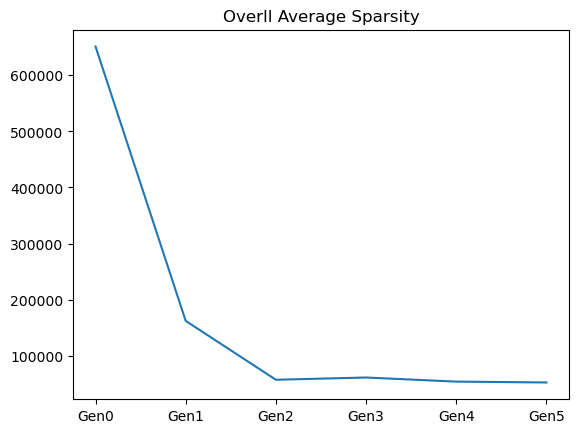

In [8]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)
y = avg_gen_sparsity
ax.plot(x,y)
plt.title("Overll Average Sparsity")
plt.show()

In [9]:
# Percentage change across overall average
avg_gen_sparsity_list = avg_gen_sparsity.tolist()
avg_gen_sparsity_percentage_change = []
for i in range(1, len(avg_gen_sparsity_list)):
    avg_gen_sparsity_percentage_change.append((avg_gen_sparsity_list[i] - avg_gen_sparsity_list[i-1]) / avg_gen_sparsity_list[i-1] * 100)
avg_gen_sparsity_percentage_change

[-75.08251839818848,
 -64.65414561989124,
 6.967676190161394,
 -11.909839174078064,
 -2.857340095112283]

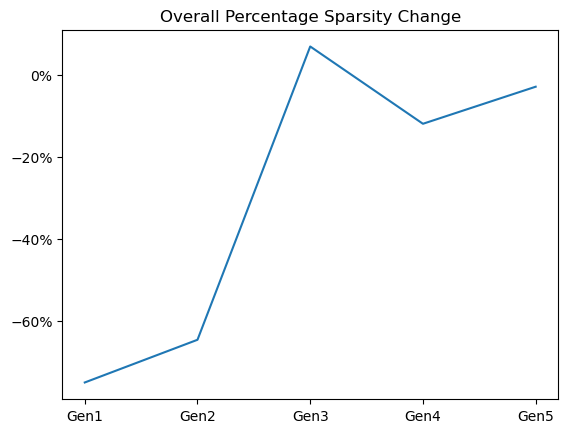

In [10]:
fig, ax = plt.subplots()
x = [1, 2, 3, 4, 5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)
y = avg_gen_sparsity_percentage_change
ax.plot(x,y)
ax.yaxis.set_major_formatter(PercentFormatter())
plt.title("Overall Percentage Sparsity Change")
plt.show()

In [11]:
# Averaging across all maps, is in order of the maps in the maps objecti
avg_map_sparsity = []
for MAP in maps:
    map_df = df[df["map-id"] == MAP]
    map_df = map_df.filter(["gen0-sparsity","gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
    avg_map_sparsity.append(map_df.mean(axis=0))

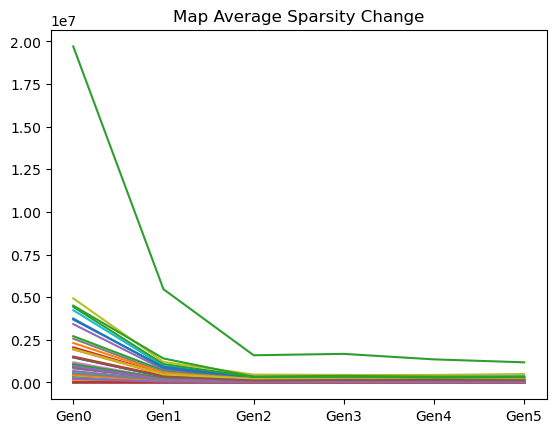

In [12]:
fig, ax = plt.subplots()
x = [0, 1, 2, 3, 4, 5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)
y = np.array(avg_map_sparsity).T
ax.plot(x,y)
plt.title("Map Average Sparsity Change")
plt.show()

In [13]:
# show the sparisty distrabution across all maps for each generation 
avg_gen0_sparsity = []
avg_gen1_sparsity = []
avg_gen2_sparsity = []
avg_gen3_sparsity = []
avg_gen4_sparsity = []
avg_gen5_sparsity = []
for map_inst in avg_map_sparsity:
    avg_gen0_sparsity.append(map_inst["gen0-sparsity"])
    avg_gen1_sparsity.append(map_inst["gen1-sparsity"])
    avg_gen2_sparsity.append(map_inst["gen2-sparsity"])
    avg_gen3_sparsity.append(map_inst["gen3-sparsity"])
    avg_gen4_sparsity.append(map_inst["gen4-sparsity"])
    avg_gen5_sparsity.append(map_inst["gen5-sparsity"])

In [14]:
# want a list representing generations, of maps, key = map-id, value = vg sparsity

In [15]:
avg_gen0_sparsity
print(min(avg_gen0_sparsity))
print(max(avg_gen0_sparsity))

678.6242866666666
19703859.653333332


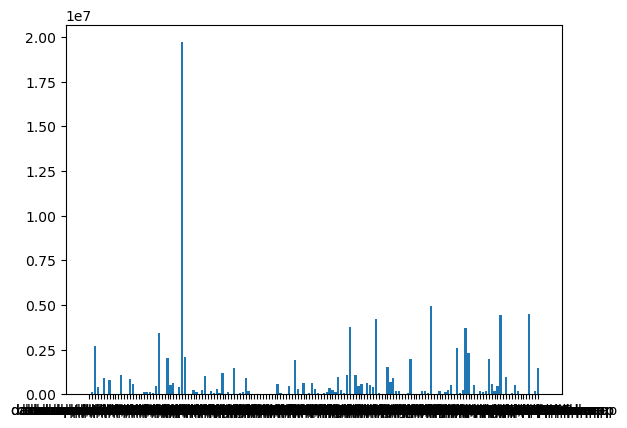

In [16]:
empty_array = [1]*156
plt.bar(maps, avg_gen0_sparsity)
plt.show()
# make skater plot!!!
# y = spasity of map averaged
# x = number of nodes: 
# look at with fixed y 

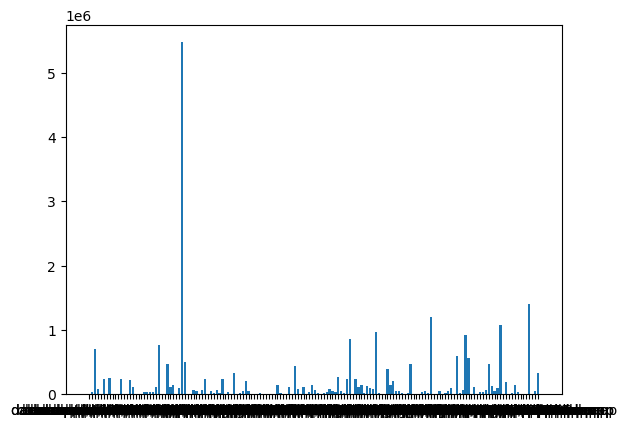

In [17]:
plt.bar(maps, avg_gen1_sparsity)
plt.show()

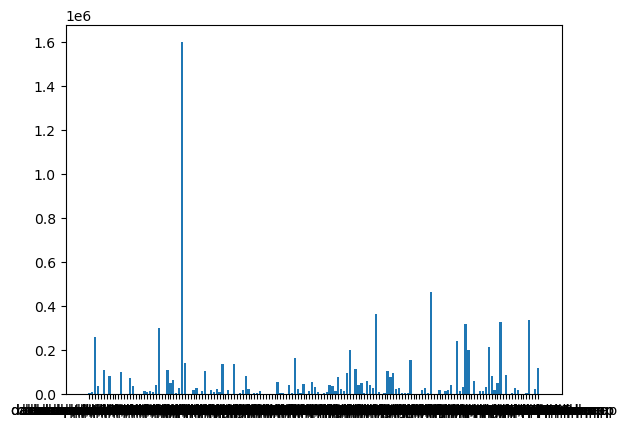

In [18]:
plt.bar(maps, avg_gen2_sparsity)
plt.show()

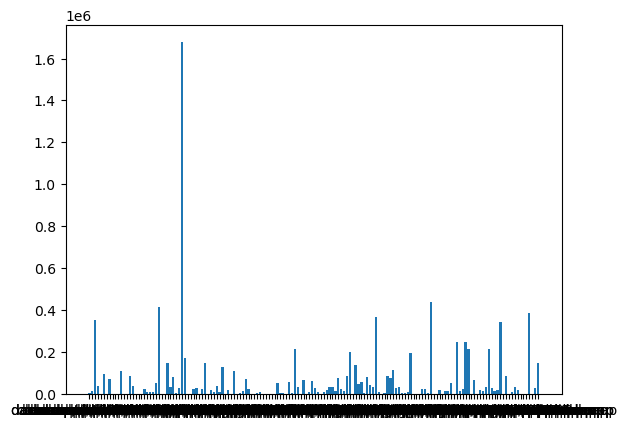

In [19]:
plt.bar(maps, avg_gen3_sparsity)
plt.show()

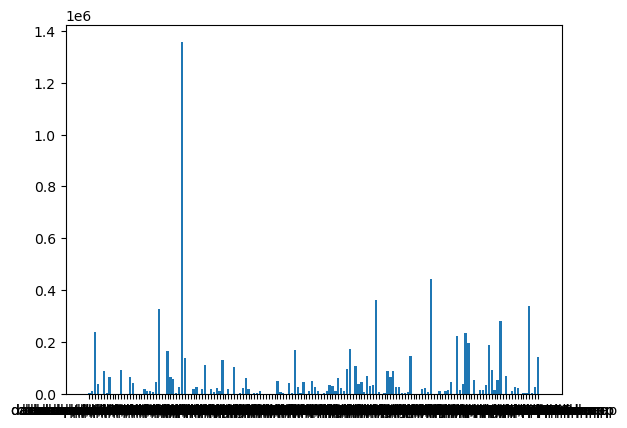

In [20]:
plt.bar(maps, avg_gen4_sparsity)
plt.show()

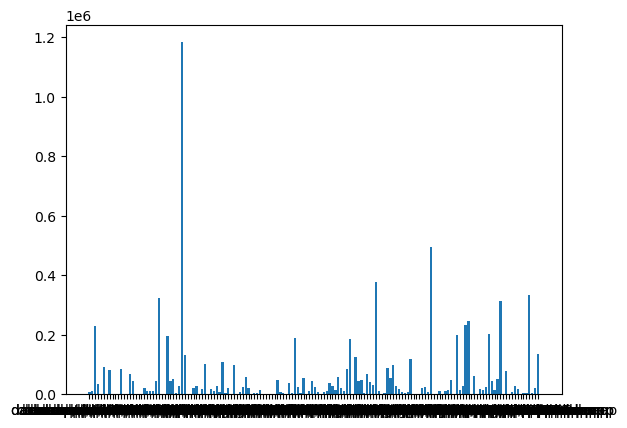

In [21]:
plt.bar(maps, avg_gen5_sparsity)
plt.show()

In [22]:
# 
# Hypervolume
#

In [23]:
# front must be a 2d matrix (?)
# calculates the HV of a front
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        h = -1
        print("-----------------------", "\n", "no good ref point")
        print(front)
    return h

In [24]:
def map_avg_HV(df):
    map_avg_HV = []
    maps = df['map-id'].unique()
    for MAP in maps:
        map_df = df[df['map-id'] == MAP]
        fronts = map_df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
        HVs = []
        for index, row in fronts:
            HVs.append(front_hv(row))
        HVs = np.array(HVs).T
        avg_HVs = []
        for gen in HVs:
            avg_HVs.append(gen.mean())
        avg_HVs = np.array(avg_HVs).T
        map_avg_HV.append(avg_HVs)
    return map_avg_HV

In [25]:
# calculate the overall average generational hypervolume
def overall_gen_HV(df):
    gen_HV = []
    fronts = df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
    # iterate through all rows and record the generations fronts hypervolume
    for index, row in fronts.iterrows():
        row_HV = []
        for front in row:
            row_HV.append(front_hv(front))
            
        gen_HV.append(row_HV)
            
    gen_HV = np.array(gen_HV).T
    avg_gen_HV = []
    for gen in gen_HV:
        avg_gen_HV.append(gen.mean())

    return avg_gen_HV

In [26]:
overall_avg_HV = overall_gen_HV(df)
overall_avg_HV = np.array(overall_avg_HV).T
overall_avg_HV

----------------------- 
 no good ref point
[[0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0]]


array([9.16266816e+15, 6.85735525e+15, 5.37950615e+15, 4.21062229e+15,
       4.56723706e+15, 4.36533467e+15])

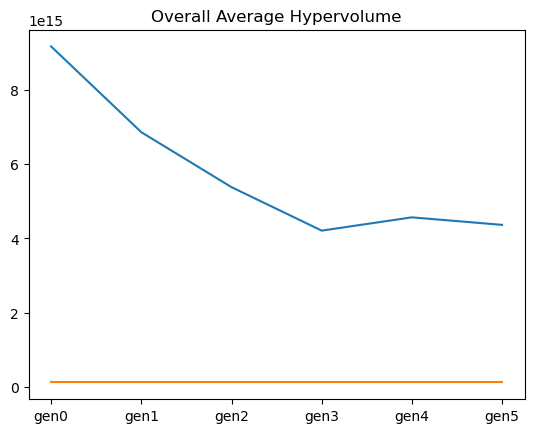

In [34]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["gen0", "gen1", "gen2", "gen3", "gen4", "gen5"]
plt.xticks(x, x_ticks)
y = overall_avg_HV
ax.plot(x,y)
# add a y axis line for the A*Pex line
ax.plot(x, [126312878037716] * 6)
plt.title("Overall Average Hypervolume")
plt.show()

In [317]:
overall_avg_HV_percentage_change = []
for i in range(1, len(overall_avg_HV)):
    overall_avg_HV_percentage_change.append((overall_avg_HV[i] - overall_avg_HV[i-1]) / overall_avg_HV[i-1] * 100)
overall_avg_HV_percentage_change

[-38.0201638053567,
 -9.234641265852119,
 -1.0387576584236855,
 -17.61613444902107,
 6.159773544227907]

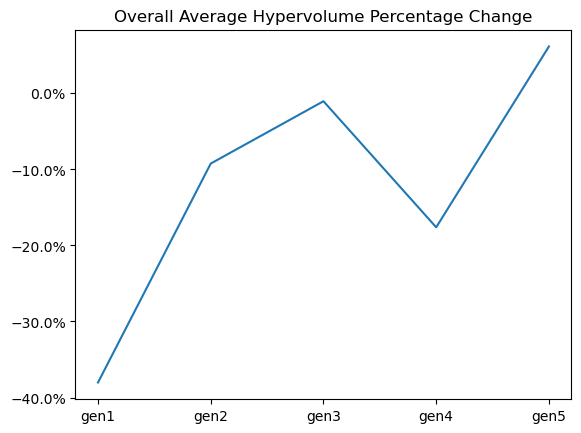

In [318]:
fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = [ "gen1", "gen2", "gen3", "gen4", "gen5"]
plt.xticks(x, x_ticks)
y = np.array(overall_avg_HV_percentage_change).T
ax.yaxis.set_major_formatter(PercentFormatter())
ax.plot(x,y)
plt.title("Overall Average Hypervolume Percentage Change")
plt.show()

In [ ]:
#
# d-score
#

In [ ]:
avg_map_sparsity = []
for MAP in maps:
    map_df = df[df["map-id"] == MAP]
    map_df = map_df.filter(["gen0-sparsity","gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
    avg_map_sparsity.append(map_df.mean(axis=0))

In [ ]:
#
# Represneative path
#

In [346]:
df.head()

,map-id,source,target,voting-mechanism,child-generation-method,gen0-front,gen0-norm-front,gen0-raw-d-score,gen0-norm-d-score,gen0-sparsity,...,gen5-front,gen5-norm-front,gen5-raw-d-score,gen5-norm-d-score,gen5-sparsity,gen5-raw-winner,gen5-norm-winner,gen5-winner-raw-d-score,gen5-winner-norm-d-score,gen5-time
0,dao-map/ost004d.map,4274,937,borda,weighted_conscious,"[[50, 50.414, 564, 126, 175.5], [50, 50.414, 5...","[[0, 0, 0.922892, 1, 0], [0, 0, 0.922892, 1, 0...","[608.123, 329.784, 630.874, 608.123]","[1.36078, 1.85242, 1.0067, 1.36078]",50956.50,...,"[[50, 52.07, 579, 75, 177.5], [50, 52.07, 579,...","[[0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0.39...","[608.123, 329.784, 630.874, 608.123]","[1, 1.07433, 1.5438, 1, 1.5438, 1.73365, 1.74883]",12467.80,"[50, 52.07, 579, 75, 177.5]","[0, 0, 1, 0, 0]",614.478,1.000000,139
1,dao-map/ost004d.map,3111,3309,borda,weighted_conscious,"[[54, 54.828, 590, 140.5, 242], [54, 54.828, 5...","[[0, 0, 1, 0.868613, 0.764706], [0, 0, 1, 0.86...","[657.515, 375.535, 621.069, 594.797]","[1.52947, 1.9492, 1.15171, 1.40308]",34958.20,...,"[[54, 66.42, 247, 81, 228], [54, 66.42, 247, 8...","[[0, 0.611111, 0.0307692, 0, 0.388889], [0, 0....","[657.515, 375.535, 621.069, 594.797]","[0.725009, 0.71316, 0.749315, 1.0037, 1.41421,...",12660.70,"[54, 66.42, 247, 81, 228]","[0, 0.611111, 0.0307692, 0, 0.388889]",356.204,0.725009,193
2,dao-map/ost004d.map,3366,4402,borda,weighted_conscious,"[[23, 30.038, 243, 60, 114], [23, 30.038, 243,...","[[0, 0, 1, 1, 0.040404], [0, 0, 1, 1, 0.040404...","[277.626, 210.434, 271.149, 270.687]","[1.41479, 1.89335, 0.987101, 1.3775]",6302.53,...,"[[23, 30.038, 242, 34.5, 112], [23, 30.038, 24...","[[0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0.22033...","[277.626, 210.434, 271.149, 270.687]","[1, 1.01772, 1.12534, 1.10902, 1.10902, 1.1090...",1183.27,"[23, 30.038, 242, 34.5, 112]","[0, 0, 1, 0, 0]",271.532,1.000000,91
3,dao-map/ost004d.map,4151,4286,borda,weighted_conscious,"[[28, 32.968, 324, 59, 133], [28, 32.968, 324,...","[[0, 0, 1, 0.507463, 0.193548], [0, 0, 1, 0.50...","[357.794, 241.014, 328.87, 333.251]","[1.13797, 2, 0.858644, 0.918202]",9105.34,...,"[[28, 33.796, 289, 42, 124], [28, 33.796, 289,...","[[0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0.29278...","[357.794, 241.014, 328.87, 333.251]","[1, 0.480699, 0.675337, 1, 1.1757, 1.90065, 1....",1417.81,"[28, 33.796, 289, 42, 124]","[0, 0, 1, 0, 0]",320.292,1.000000,94
4,dao-map/ost004d.map,3615,497,borda,weighted_conscious,"[[45, 62.802, 473, 84.5, 179], [45, 62.802, 47...","[[0, 0, 0.848276, 0.0752688, 0], [0, 0, 0.8482...","[518.536, 425.795, 559.391, 518.536]","[0.851609, 2, 1.00141, 0.851609]",27993.60,...,"[[45, 62.802, 473, 84.5, 179], [45, 62.802, 47...","[[0, 0, 0.799087, 0.341463, 0], [0, 0, 0.79908...","[518.536, 425.795, 559.391, 518.536]","[0.868986, 0.598019, 1.0158, 0.664404, 0.63884...",1231.86,"[45, 62.802, 473, 84.5, 179]","[0, 0, 0.799087, 0.341463, 0]",518.536,0.868986,208


In [446]:
#overall average
norm_df = df.filter(["gen0-norm-winner", "gen1-norm-winner", "gen2-norm-winner", "gen3-norm-winner", "gen4-norm-winner", "gen5-norm-winner"])
rep_df = df.filter(["gen0-raw-winner", "gen1-raw-winner", "gen2-raw-winner", "gen3-raw-winner", "gen4-raw-winner", "gen5-raw-winner"])
rep_df.head()

,gen0-raw-winner,gen1-raw-winner,gen2-raw-winner,gen3-raw-winner,gen4-raw-winner,gen5-raw-winner
0,"[50, 50.414, 564, 126, 175.5]","[50, 52.07, 347, 117.5, 177.5]","[50, 52.07, 579, 75, 177.5]","[50, 52.07, 579, 75, 177.5]","[50, 52.07, 579, 75, 177.5]","[50, 52.07, 579, 75, 177.5]"
1,"[54, 57.312, 562, 81, 239]","[54, 66.42, 247, 81, 228]","[54, 66.42, 247, 81, 228]","[54, 66.42, 247, 81, 228]","[54, 66.42, 247, 81, 228]","[54, 66.42, 247, 81, 228]"
2,"[23, 30.038, 236, 60, 112]","[23, 30.038, 242, 34.5, 112]","[23, 30.038, 242, 34.5, 112]","[23, 30.038, 242, 34.5, 112]","[23, 30.038, 242, 34.5, 112]","[23, 30.038, 242, 34.5, 112]"
3,"[28, 33.796, 297, 42, 127.5]","[28, 36.28, 206, 42, 124.5]","[28, 33.796, 289, 42, 124]","[28, 33.796, 289, 42, 124]","[28, 33.796, 289, 42, 124]","[28, 33.796, 289, 42, 124]"
4,"[45, 62.802, 473, 84.5, 179]","[45, 62.802, 473, 84.5, 179]","[45, 62.802, 473, 84.5, 179]","[46, 63.388, 423, 77.5, 183]","[45, 62.802, 473, 84.5, 179]","[45, 62.802, 473, 84.5, 179]"


In [447]:
norm_df

,gen0-norm-winner,gen1-norm-winner,gen2-norm-winner,gen3-norm-winner,gen4-norm-winner,gen5-norm-winner
0,"[0, 0, 0.922892, 1, 0]","[0, 0.0694806, 0.4, 0.833333, 0.0338983]","[0, 0.0871304, 1, 0, 0.0465116]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]"
1,"[0, 0.115385, 0.924933, 0, 0.676471]","[0, 0.538462, 0.080429, 0, 0.352941]","[0, 0.478261, 0.0597015, 0, 0.521739]","[0, 0.611111, 0.0289855, 0, 0.388889]","[0, 0.611111, 0.0289855, 0, 0.388889]","[0, 0.611111, 0.0307692, 0, 0.388889]"
2,"[0, 0, 0.947368, 1, 0]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]"
3,"[0, 0.0595769, 0.853261, 0, 0.0752688]","[0, 0.238308, 0.358696, 0, 0.0107527]","[0, 0.184657, 0.785276, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]"
4,"[0, 0, 0.848276, 0.0752688, 0]","[0, 0, 0.848276, 0.0752688, 0]","[0, 0, 0.837638, 0.175, 0]","[0.125, 0.0923707, 0.558685, 0, 0.125]","[0, 0, 0.793427, 0.368421, 0]","[0, 0, 0.799087, 0.341463, 0]"
...,...,...,...,...,...,...
2335,"[0.047619, 0, 0.881535, 0.619753, 0.375367]","[0.047619, 0.0715912, 0.959233, 0.0111111, 0.0...","[0.230769, 0.121495, 0.503419, 0.0215827, 0.06...","[0, 0.0771357, 0.955474, 0, 0.0653595]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]"
2336,"[0, 0, 0.838819, 0.579892, 0]","[0, 0, 0.87423, 0.579892, 0]","[0.0833333, 0.0257424, 0.703364, 0.00928793, 0...","[0.0714286, 0.0236634, 0.695035, 0, 0.12381]","[0, 0, 0.844985, 1, 0]","[0, 0, 0.844985, 0.981595, 0]"
2337,"[0.0148148, 0.109221, 0.98865, 0, 0.298969]","[0.037037, 0.0409141, 0.832736, 0.00657895, 0....","[0.0697674, 0.034448, 0.710345, 0.011335, 0.05...","[0.09375, 0.0346664, 0.697049, 0.011335, 0.068...","[0.0909091, 0.0344694, 0.694949, 0.011335, 0.0...","[0.09375, 0.0346664, 0.694343, 0.011335, 0.068..."
2338,"[0, 0.11478, 0.916096, 0, 0.466667]","[0.0192308, 0.112051, 0.460616, 0.00548446, 0....","[0, 0.0944074, 0.950189, 0.05, 0.0540541]","[0, 0, 0.988228, 0.179487, 0]","[0.111111, 0.0184451, 0.838033, 0, 0.0425532]","[0, 0, 0.988197, 0.186667, 0]"


In [373]:
#input is a column of 1 x n lists. returns a 1 x n list of the column wise average
def column_list_average(column):
    gen_costs_matrix = column.tolist()
    gen_cost_df = pd.DataFrame(gen_costs_matrix, columns = ["C1", "C2", "C3", "C4", "C5"])
    gen_cost_list = gen_cost_df.mean(axis=0).tolist()
    return gen_cost_list

In [450]:
average_gen_rep_path = []
for gen in norm_df:
    average_gen_rep_path.append(column_list_average(norm_df[gen]))
average_gen_rep_path

[[0.005386200465811966,
  0.06043007052991454,
  0.8616901171367521,
  0.2876062945726495,
  0.19416095488461538],
 [0.011481724863247863,
  0.13601768135042736,
  0.5625929545299145,
  0.04983846640940171,
  0.08743885867094016],
 [0.04266164346153846,
  0.21822711746581205,
  0.5433867113333334,
  0.0640207712863248,
  0.1294288160854701],
 [0.026274077222222223,
  0.17540546248717953,
  0.5978208901709402,
  0.09183616582051281,
  0.12162600335470085],
 [0.0249604773974359,
  0.1550780691452992,
  0.6238837402564102,
  0.09144452953846154,
  0.1120210177051282],
 [0.02492224303846154,
  0.14766592158119662,
  0.6272601477350428,
  0.10055503122649571,
  0.10628855365811965]]

In [451]:
average_gen_rep_path[0]

[0.005386200465811966,
 0.06043007052991454,
 0.8616901171367521,
 0.2876062945726495,
 0.19416095488461538]

In [ ]:
# fixed y axis [0,1]
# error bar (needs std) 

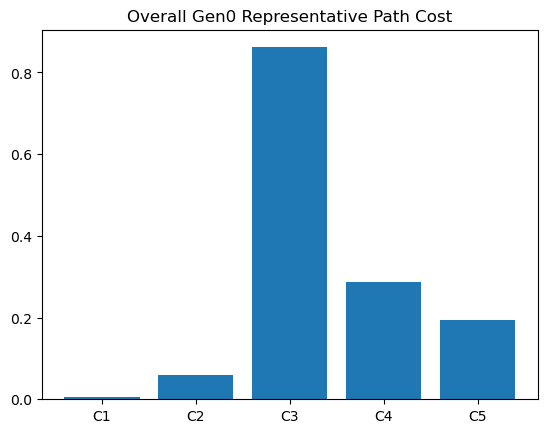

[0.005386200465811966, 0.06043007052991454, 0.8616901171367521, 0.2876062945726495, 0.19416095488461538]


In [452]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[0])
plt.title("Overall Gen0 Representative Path Cost")
plt.show()
print(average_gen_rep_path[0])

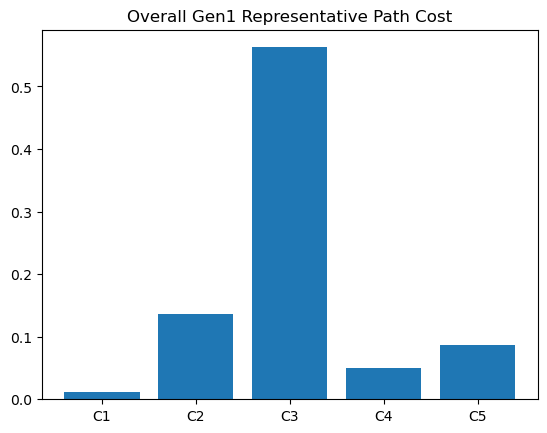

[0.011481724863247863, 0.13601768135042736, 0.5625929545299145, 0.04983846640940171, 0.08743885867094016]


In [453]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[1])
plt.title("Overall Gen1 Representative Path Cost")
plt.show()
print(average_gen_rep_path[1])

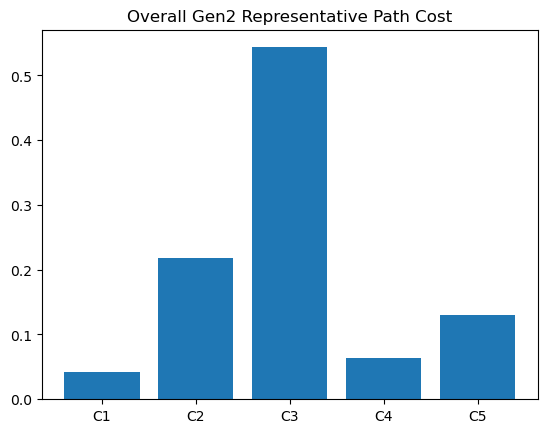

[0.04266164346153846, 0.21822711746581205, 0.5433867113333334, 0.0640207712863248, 0.1294288160854701]


In [454]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[2])
plt.title("Overall Gen2 Representative Path Cost")
plt.show()
print(average_gen_rep_path[2])

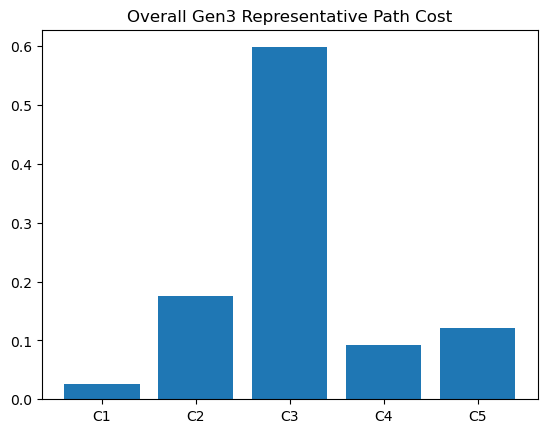

[0.026274077222222223, 0.17540546248717953, 0.5978208901709402, 0.09183616582051281, 0.12162600335470085]


In [455]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[3])
plt.title("Overall Gen3 Representative Path Cost")
plt.show()
print(average_gen_rep_path[3])

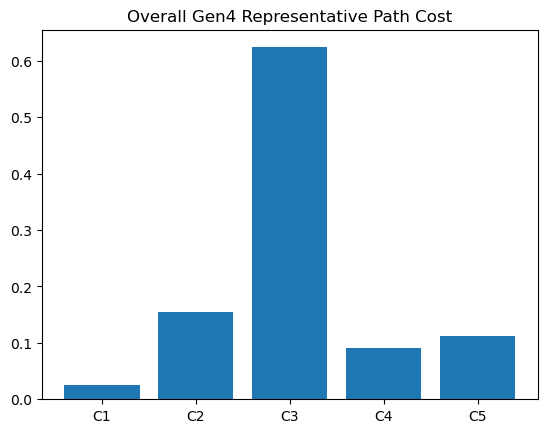

[0.0249604773974359, 0.1550780691452992, 0.6238837402564102, 0.09144452953846154, 0.1120210177051282]


In [456]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[4])
plt.title("Overall Gen4 Representative Path Cost")
plt.show()
print(average_gen_rep_path[4])

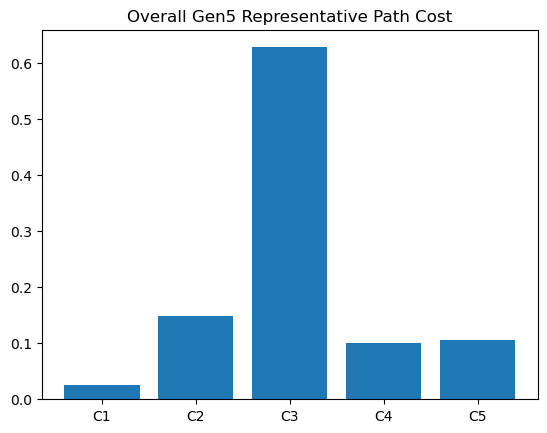

[0.02492224303846154, 0.14766592158119662, 0.6272601477350428, 0.10055503122649571, 0.10628855365811965]


In [457]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[5])
plt.title("Overall Gen5 Representative Path Cost")
plt.show()
print(average_gen_rep_path[5])

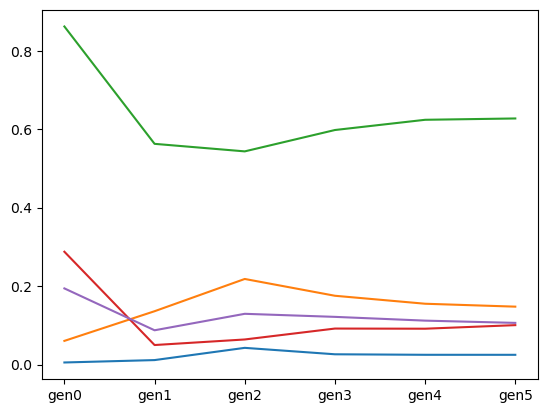

In [458]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["gen0", "gen1", "gen2", "gen3", "gen4", "gen5"]
plt.xticks(x, x_ticks)
y = average_gen_rep_path
ax.plot(x,y)
plt.title("")
plt.show()

In [31]:
#problem: not all instnaces have the same size!
avg_map_d_score = []
avg_map_norm_d_score = []
for MAP in maps:
    map_df = df[df["map-id"] == MAP]
    raw_df = map_df.filter(["gen0-raw-d-score", "gen1-raw-d-score", "gen2-raw-d-score", "gen3-raw-d-score", "gen4-raw-d-score", "gen5-raw-d-score"])
    norm_df = map_df.filter(["gen0-norm-d-score", "gen1-norm-d-score", "gen2-norm-d-score", "gen3-norm-d-score", "gen4-norm-d-score", "gen5-norm-d-score"])
    for index, row in raw_df.iterrows():
        map_inst = []
        for gen in row:
            map_inst.append(np.array(gen).mean())
#            print(gen)
#            print(np.array(gen).mean())
#            print("-")
#        print("----")
        avg_map_d_score.append(np.array(map_inst).mean())


In [ ]:
#
# Run time
#

In [434]:
run_times = []
time_df = df.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])
for gen in time_df:
    run_times.append(time_df[gen].to_list())

In [28]:
time_df = df.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])
gen_time_avg = time_df.mean(axis=0)
gen_time_avg

gen0-time    982.758120
gen1-time    654.498291
gen2-time    751.698718
gen3-time    755.895299
gen4-time    755.734188
gen5-time    755.040598
dtype: float64

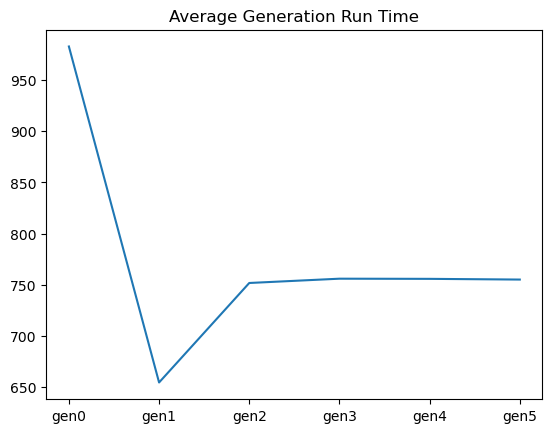

In [30]:
fig, ax = plt.subplots()
x = [0, 1,2,3,4,5]
x_ticks = ["gen0", "gen1", "gen2", "gen3", "gen4", "gen5"]
plt.xticks(x, x_ticks)
y = np.array(gen_time_avg).T
ax.plot(x,y)
plt.title("Average Generation Run Time")
plt.show()
# use box and whisker plots for the run time (shows range of the value) use the map averages
# error rate (those that need more then 5 mins)
# scatter plot with (number of number of nodes on the x axis, and edges (for future refrecnce), plot time on y axis for each maps